In [12]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import os 
import numpy as np
import sigpy as sp
import sigpy.plot as pl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
'''
data_path = '/mikRAID/frank/data/cube_knees/train_mask_slices/13_92.npy'
'''
print('', end='')

In [4]:
data_path = '/mikRAID/frank/data/cube_knees/'
ksp_data_path = data_path + 'train_ksp_slices/13_92.npy'
mask_data_path = data_path + 'train_mask_slices/13_92.npy'
# data_path = path + os.listdir(path)
ksp = np.load(ksp_data_path)
mask = np.load(mask_data_path)

In [5]:
mask.shape, ksp.shape

((256, 320), (8, 256, 320))

In [6]:
from cs285.infrastructure.env import Env

In [7]:
'''
self.device = args.device
self.actions = np.zeros(256) # 256 lines of k-space. For radial its 360 degrees of freedom.
self.ksp = args.ksp # k-space 3D.
self.coord = args.coord
self.state_buffer = deque([], maxlen=args.history_length)
self.training = True
self.window = args.history_length
self.baseline = args.baseline
self.total_var = args.total_var
self.gans = args.gans
self.prev_step = self.get_image() # useless???
self.loss_type = args.loss_type # this is l1, l2 or neg prob (for short l3).
self.cartesian = args.cartesian
'''
print('',end='')

In [8]:
import torch 
torch.cuda.set_device(3)
args = {}
args['device'] = torch.cuda.current_device()
args['ksp'] = ksp 
args['mask_shape'] = mask.shape
args['coord'] = None
args['history_length'] = 10
args['total_var'] = False 
args['baseline'] = True 
args['gans'] = False 
args['loss_type'] = 1
args['cartesian'] = True 

In [9]:
pl.ImagePlot(sp.ifft(ksp)).shape

NameError: name 'pl' is not defined

In [14]:
ksp.shape

(8, 256, 320)

<IPython.core.display.Javascript object>


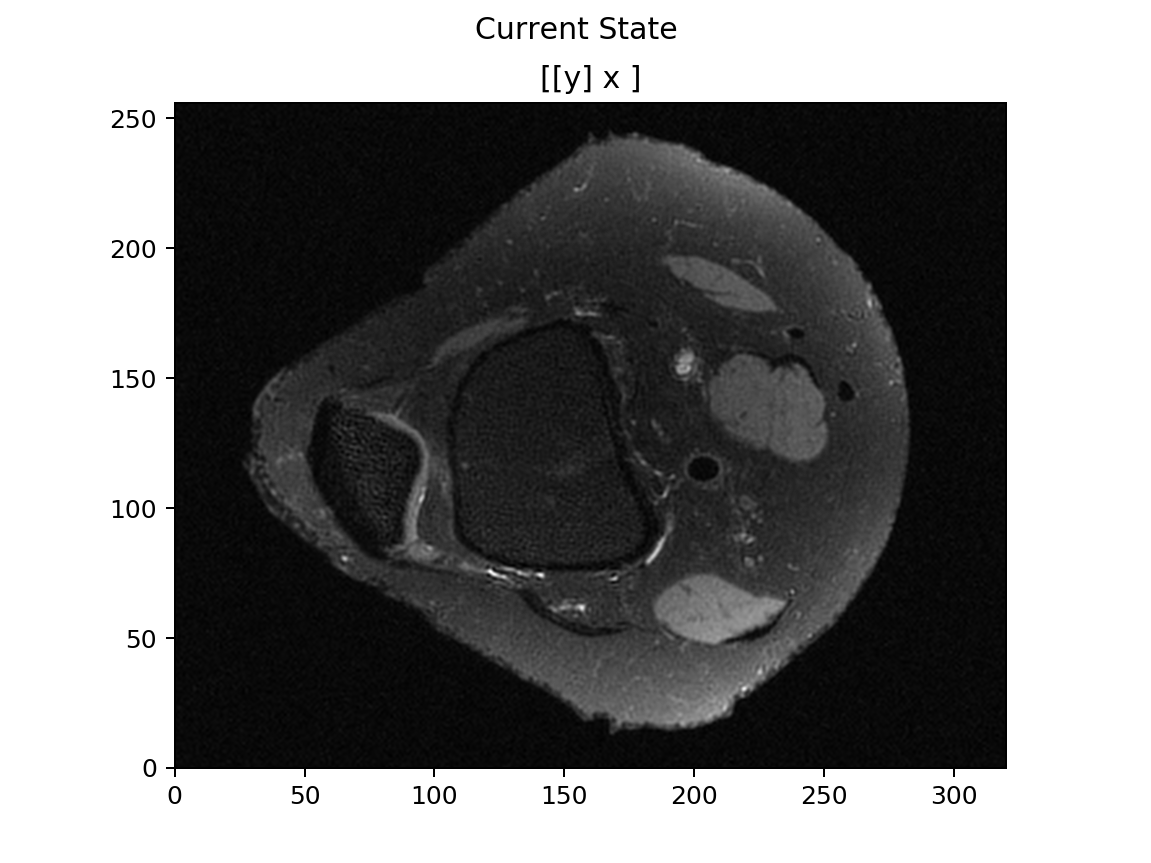

In [15]:
import sigpy as sp
import sigpy.mri as mr
import sigpy.plot as pl

pl.ImagePlot(sp.rss(sp.ifft(ksp),axes=0), title='Current State')

In [10]:
e = Env(args)

In [11]:
torch.cuda.current_device()

3

In [12]:
e.step(235)

/home/gnahum/cs285/final_project/cs285/infrastructure/env.py:81: RuntimeWarning: divide by zero encountered in double_scalars
  reward = (loss - self.prev_loss) / self.prev_loss


([array([[[-2.17537373e-04-1.14566495e-04j,
           -4.33019459e-04-4.02135338e-04j,
           -5.45186040e-05-5.78413910e-04j, ...,
            3.68119001e-05+1.26962715e-04j,
            2.33336748e-04+2.98690878e-05j,
            1.99830013e-04-5.03420316e-06j],
          [ 2.45746056e-04-7.54096091e-06j,
            5.74976379e-04+1.36458217e-04j,
            3.32535099e-04+4.76398297e-04j, ...,
           -9.46092480e-05-9.23240875e-05j,
           -2.17745688e-04+8.90225565e-05j,
           -1.71388145e-04+1.02876047e-04j],
          [-2.10103521e-04+1.27689079e-04j,
           -5.67539477e-04+1.64674298e-04j,
           -5.24150323e-04-2.50602012e-04j, ...,
            1.27824652e-04+3.36972602e-05j,
            1.45578634e-04-1.84783824e-04j,
            9.84151781e-05-1.73988017e-04j],
          ...,
          [-1.09193355e-04+2.20283457e-04j,
           -3.91387393e-04+4.42757937e-04j,
           -5.76901749e-04+6.86971720e-05j, ...,
            1.26021067e-04-3.99166340e

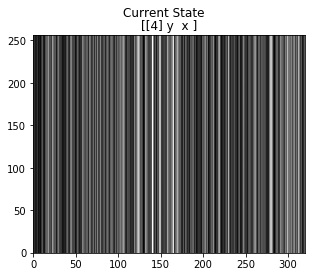

In [13]:
e.render()

In [32]:
e.reset()

<class 'numpy.ndarray'>


([array([[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
  
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
  
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
  
         ...,
  
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
         

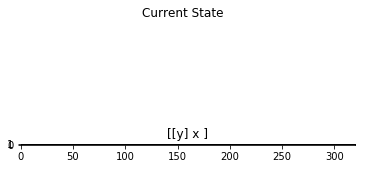

In [15]:
e.render()

In [33]:
a = e.step(1)

In [40]:
len(a[0]), a[0][0].shape

(10, (8, 256, 320))

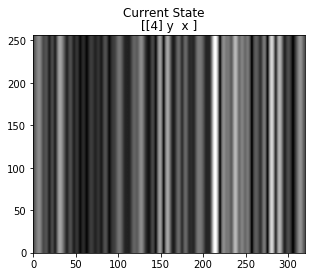

In [41]:
e.render()

In [44]:
for i in range(1,150): 
    e.step(i)

/home/gnahum/cs285/final_project/cs285/infrastructure/env.py:81: RuntimeWarning: invalid value encountered in double_scalars
  reward = (loss - self.prev_loss) / self.prev_loss


In [ ]:
a = [e.step(i) for i in range(256)]

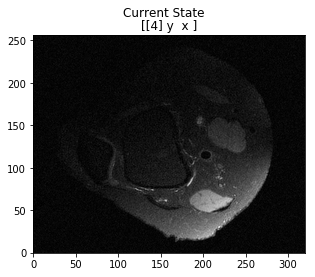

In [45]:
e.render()